In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


# Part 1: Prepare the Data

In [2]:


# 1.1 Read myopia.csv.
file_path = Path('Resources/Myopia.csv')
df = pd.read_csv(file_path)
df.head()


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
df["MYOPIC"].nunique()


2

In [4]:
labels = df['MYOPIC']
labels.value_counts().nunique()

2

In [5]:
# Get the shape of dataset
df.shape


(618, 15)

In [6]:

# Get column names
df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [7]:
# Null values?--nope
df.isnull().sum()

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
MYOPIC       0
dtype: int64

In [8]:

# dupes? --nope
df.duplicated().sum()

0

In [9]:
# not needed, but look at the data in general- see if any 'NaN' or other things pop up and smack us in the face
df.describe()


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,6.299353,0.801010,22.496780,3.578629,3.541453,15.376780,11.953074,2.796117,2.105178,1.490291,8.948220,26.017799,0.506472,0.498382,0.131068
std,0.712950,0.625918,0.680141,0.230394,0.154519,0.664183,7.968296,3.068191,3.056508,2.216207,5.719021,16.031715,0.500363,0.500402,0.337748
min,5.000000,-0.699000,19.900000,2.772000,2.960000,13.380000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,6.000000,0.456250,22.040001,3.424000,3.436000,14.930000,6.000000,0.000000,0.000000,0.000000,4.250000,15.000000,0.000000,0.000000,0.000000
50%,6.000000,0.729000,22.464999,3.585000,3.542000,15.360000,10.000000,2.000000,1.000000,1.000000,8.000000,23.000000,1.000000,0.000000,0.000000
75%,6.000000,1.034000,22.969999,3.730000,3.640000,15.840000,16.000000,4.000000,3.000000,2.000000,12.000000,34.000000,1.000000,1.000000,0.000000
max,9.000000,4.372000,24.559999,4.250000,4.112000,17.299999,45.000000,20.000000,30.000000,15.000000,31.000000,101.000000,1.000000,1.000000,1.000000


In [10]:

# 1.2 Remove the "MYOPIC" column from the dataset- this is UN-supervised.
# Meaning the Y/N (1/0) result in "Myopic" is the answer already- and we want to predict it- not already know it.
df = df.drop('MYOPIC', axis=1)
# Save the cleaned dataframe as a new csv file for future analysis
file_path = Path('Resources/cleaned_myopia.csv')
df.to_csv(file_path, index=False)

In [11]:
# 1.3 Standardize columns so some values do not influence 
# the outcome unfairly

# Scaler to standardize dataset
scaler = StandardScaler()

# Train the scaler with the data.
X_scaled = scaler.fit_transform(df)

In [12]:
# There are 14 variables in the Myopia Datasets 
X_scaled[0]


array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

# Part 2: Apply Dimensionality Reduction

In [13]:
# 2.1 time to reduce dimensionality using PCA. Features change?
 # Initialize PCA model preserving 99% of the explained variance in dimensionality reduction
# because n_components=0.99 was in the instructions
pca = PCA(n_components=0.99)

In [14]:
# Get the principal components for the X_train_scaled
myopia_pca = pca.fit_transform(X_scaled)


In [15]:
# Get the explained variance ratio--here is where I would disagree and say n_components could be something like 90%
# but I am following instructions!
pca.explained_variance_ratio_.sum()

0.9999988998816082

In [16]:
# Get the shape of features after reduction
myopia_pca.shape


(618, 12)

In [17]:

# 2.2 Further reduce the dataset dimensions with t-SNE and visually inspect the results. 

# To do this, run t-SNE on the principal components, which is the output of the PCA transformation.
#Initialize the t-SNE model
tsne = TSNE(learning_rate=250, n_components=3,verbose=1, n_iter=2500)
#Reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 618 samples in 0.002s...
[t-SNE] Computed neighbors for 618 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 618 / 618
[t-SNE] Mean sigma: 1.354653
[t-SNE] KL divergence after 250 iterations with early exaggeration: 115.466759
[t-SNE] KL divergence after 2500 iterations: 2.272198


In [18]:

# Get the shape of features after reduction--look the shape is three...just like we told it to change n_components to...three
# good job little model, of doing what I told you to, can I have you talk to my son about following instructions?
tsne_features.shape

(618, 3)

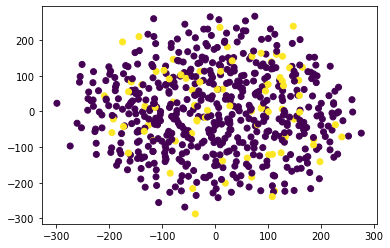

In [19]:
# 2.3 Create a scatter plot of the t-SNE output. Are there distinct clusters?--there's a pattern-ish going on here
# but not enough of one to get on a soapbox and start preaching about.
plt.scatter(tsne_features[:,0],tsne_features[:,1],c=labels)


# Part 3: Perform a Cluster Analysis with K-means

In [20]:
#3.1  Create an elbow plot --whats the best number of clusters. 

# Use a for loop to determine the inertia for each k between 1 through 12--why? because why not? tried 10, it was uglier.
inertia = []
k = list(range(1, 13))

In [21]:
# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

In [22]:
# 3.2 If possible, determine where the elbow of the plot is, and at which value of k it appears.
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,8651.990482
1,2,7497.105614
2,3,6732.085949
3,4,6362.276551
4,5,6083.170887


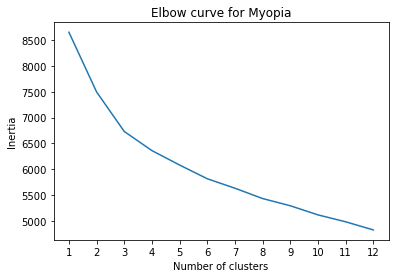

In [23]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,13))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopia')
plt.show()

In [24]:
len(pca.components_)

12

In [25]:
# Create a DataFrame from the PCA transformed data to model and plot K-Means 
columns=[]
for i in range(len(pca.components_)):
    columns.append(i+1)
pca_df = pd.DataFrame(myopia_pca, columns=columns)
pca_df['class']= km.labels_
pca_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-1.389112,-0.574909,9
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-0.118153,0.527492,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,-0.287739,0.128478,5
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0.652956,-0.672679,9
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,0.007640,0.995370,6


In [26]:
# Initialize the K-Means model with n_clusters 3
model = KMeans(n_clusters=3, random_state=0)

In [27]:
# Train the model
model.fit(pca_df)

KMeans(n_clusters=3, random_state=0)

In [28]:
# Predict clusters
predictions = model.predict(pca_df)

In [29]:
# Add predicted clusters (labels) to DataFrame
pca_df['class'] = model.labels_

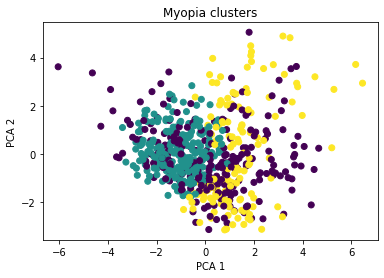

In [30]:
# Plot the Clusters
plt.scatter(x=pca_df[1], y=pca_df[2], c=pca_df['class'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Myopia clusters')
plt.show()

# Part 4: Make a Recommendation

# Myopia Clusters Findings

## Data prepared, Dimensionality Reduction using PCA applied and reduced further using t-SNE and Cluster Analysis with K-Means model the following insights can be made:

     There are 3 clusters noted- all seem to overlap each other.

     t-SNE was not helpful in finding clusters, there was no difference noted after adjusting perplexity. After attempting various levels of perplexity, scatter plot changes were minimal. Decision to leave perplexity at default (perplexity=30) since no readily visible changes noted with other levels.

    Pattern (sort of) was forming using K-Means clustering but the dataset is only 618 records. Not enough data to be attempting to predictions.

## Recommendation: Need more data to reasonably create test and training data sets. This would result in more confident predictions.
